### Analysis of MovieLens Data

We are provided with the MovieLens data collected by the GroupLens Research Project at the University of Minnesota.
In particular, the data was collected through the MovieLens web site (movielens.umn.edu), which records a number of users' ratings (1-5) towards their watched movies. Besides, simple demographic info (e.g., age and gender) for the users and descriptive info (e.g., title and genre) for the movies are provided. 

Originally, there are several separate files to record the user-movie rating info, user demographic info and movie descriptive info, we have conducted preliminary processing to map and merge the data into one csv file named 'movielens_data.csv'. The header of the csv file is shown below. 

| userId | age | gender | occupation| movieId | rating | genre | timestamp |
    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | 
    
#### Description of Fields

* __userId__ - the user's id
* __age__ - the user's age
* __gender__ - the user's gender
* __occupation__ - the user's occupation
* __movieId__ - the movie's id
* __rating__ - the user's rating towards the movie
* __genre__ - the genre of the movie
* __timestamp__ - the timestamp indicating when the user rated the movie

Note that, a same user (i.e., a same userId) corresponds to a same age/gender/occupation; a same movie (i.e., a same movieId) corresponds to a same genre; a same user (i.e., a same userId) may rate multiple movies and a same movie (i.e., a same movieId) may receive ratings from multiple users.

There are four questions to explore with the data as shown below.

 #### Q1. Remove missing data
 
Please remove the following records in the csv file: 
 
 * age/gender/rating is missing
 * occupation is 'none'

__Print the length of the data__ before and after removing the missing data.  

In [1]:
# your code and solutions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Movielens = pd.read_csv("files\movielens_data.csv")

# length of data before removing missing data
print("The length of data before removing the missing data =", len(Movielens))
Movielens.head(20)

The length of data before removing the missing data = 100000


,userId,age,gender,occupation,movieId,rating,genre,timestamp
0,196,49.0,M,writer,242,3.0,Comedy,881250949
1,186,39.0,F,executive,302,NaN,Crime,891717742
2,22,25.0,M,writer,377,1.0,Children,878887116
3,244,28.0,M,technician,51,2.0,Romance,880606923
4,166,47.0,NaN,educator,346,1.0,Drama,886397596
5,298,44.0,M,executive,474,4.0,War,884182806
6,115,NaN,M,engineer,265,2.0,Action,881171488
7,253,26.0,F,librarian,465,5.0,Adventure,891628467
8,305,23.0,M,programmer,451,3.0,Romance,886324817
9,6,42.0,M,executive,86,3.0,Drama,883603013


In [2]:
# dropping occupation equales to "none"
Clean_Movielens = Movielens.drop(Movielens.index[(Movielens["occupation"] == "none")])

#dropping all missing values remaining
Clean_Movielens = Clean_Movielens.dropna()

# length of data after removing missing data
print("The length of data after removing all missing data =", len(Clean_Movielens))

Clean_Movielens.head(20)

The length of data after removing all missing data = 99022


,userId,age,gender,occupation,movieId,rating,genre,timestamp
0,196,49.0,M,writer,242,3.0,Comedy,881250949
2,22,25.0,M,writer,377,1.0,Children,878887116
3,244,28.0,M,technician,51,2.0,Romance,880606923
5,298,44.0,M,executive,474,4.0,War,884182806
7,253,26.0,F,librarian,465,5.0,Adventure,891628467
8,305,23.0,M,programmer,451,3.0,Romance,886324817
9,6,42.0,M,executive,86,3.0,Drama,883603013
10,62,27.0,F,administrator,257,2.0,Sci-Fi,879372434
11,286,27.0,M,student,1014,5.0,Comedy,879781125
12,200,40.0,M,programmer,222,5.0,Sci-Fi,876042340


#### Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique users, unique occupations, unique movies, and unique genres
* Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
* Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of movies rated by each user 
* Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each movie 


In [3]:
# your code and solutions
# Q2.1
print("Q2.1")
# total number of unique users, occupations, movies, and genres
Total_Unique_User = Clean_Movielens["userId"].nunique()
Total_Unique_Occupation = Clean_Movielens["occupation"].nunique()
Total_Unique_Movies = Clean_Movielens["movieId"].nunique()
Total_Unique_Genres = Clean_Movielens["genre"].nunique()

print("Total Number of Unique Users =", Total_Unique_User)
print("Total Number of Unique Occupations =", Total_Unique_Occupation)
print("Total Number of Unique Movies =", Total_Unique_Movies)
print("Total Number of Unique Genre =", Total_Unique_Genres)

Q2.1
Total Number of Unique Users = 934
Total Number of Unique Occupations = 20
Total Number of Unique Movies = 1682
Total Number of Unique Genre = 19


In [4]:
# Q2.2
print("Q2.2")

#descriptive statistics for all numerical records
print("This is the descriptive statistics for all rating records:")
Clean_Movielens.describe()

Q2.2
This is the descriptive statistics for all rating records:


,userId,age,movieId,rating,timestamp
count,99022.000000,99022.000000,99022.000000,99022.000000,9.902200e+04
mean,464.421512,33.042607,425.231524,3.527792,8.835657e+08
std,266.256180,11.560676,330.595625,1.125743,5.339897e+06
min,1.000000,7.000000,1.000000,1.000000,8.747247e+08
25%,261.000000,24.000000,175.000000,3.000000,8.794542e+08
50%,450.000000,30.000000,321.000000,4.000000,8.828939e+08
75%,683.000000,40.000000,631.000000,4.000000,8.883332e+08
max,943.000000,73.000000,1682.000000,5.000000,8.932866e+08


In [5]:
# descriptive statistics for "gender" category
Clean_Movielens["gender"].describe()

count     99022
unique        2
top           M
freq      73669
Name: gender, dtype: object

In [6]:
# descriptive statistics for "occupation" category
Clean_Movielens["occupation"].describe()

count       99022
unique         20
top       student
freq        21950
Name: occupation, dtype: object

In [7]:
# descriptive statistics for "genre" category
Clean_Movielens["genre"].describe()

count     99022
unique       19
top       Drama
freq      24198
Name: genre, dtype: object

In [8]:
# Q2.3
print("Q2.3")

# descriptive statistics for movies rated by each user
movieId_by_userId = Clean_Movielens.groupby(["userId"])["movieId"]
print("This is the descriptive statistics for the number of movies rated by each user:")
movieId_by_userId.describe()

Q2.3
This is the descriptive statistics for the number of movies rated by each user:


,count,mean,std,min,25%,50%,75%,max
userId,,,,,,,,
1,272.0,136.500000,78.663842,1.0,68.75,136.5,204.25,272.0
2,62.0,249.500000,93.021194,1.0,260.75,285.5,300.75,316.0
3,54.0,318.814815,33.955061,181.0,304.00,328.5,341.75,355.0
4,24.0,291.041667,90.440218,11.0,269.25,313.5,356.25,362.0
5,170.0,292.582353,138.830264,1.0,173.25,370.5,412.75,457.0
...,...,...,...,...,...,...,...,...
939,49.0,514.081633,337.429365,9.0,257.00,411.0,756.00,1277.0
940,107.0,346.850467,268.088791,4.0,169.00,286.0,495.00,1401.0
941,22.0,357.818182,304.156701,1.0,155.50,283.5,443.25,1007.0


In [9]:
# Q2.4
print("Q2.4")

# descriptive statistics for rating received by each movie
rating_by_movieId = Clean_Movielens.groupby(["movieId"])["rating"]
print("This is the descriptive statistics for number of ratings that received by each movie:")
rating_by_movieId.describe()

Q2.4
This is the descriptive statistics for number of ratings that received by each movie:


,count,mean,std,min,25%,50%,75%,max
movieId,,,,,,,,
1,445.0,3.876404,0.927802,1.0,3.0,4.0,5.0,5.0
2,129.0,3.186047,0.958249,1.0,3.0,3.0,4.0,5.0
3,88.0,3.034091,1.188536,1.0,2.0,3.0,4.0,5.0
4,206.0,3.543689,0.955362,1.0,3.0,4.0,4.0,5.0
5,84.0,3.273810,0.935913,1.0,3.0,3.0,4.0,5.0
...,...,...,...,...,...,...,...,...
1678,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0
1679,1.0,3.000000,NaN,3.0,3.0,3.0,3.0,3.0
1680,1.0,2.000000,NaN,2.0,2.0,2.0,2.0,2.0


#### Q3. Plotting and Analysis

Please try to explore the correlation between gender/occupation/genre and ratings; for instance, do female/male users tend to provide higher ratings than male/female users? Hint: you may use the boxplot function to plot figures for comparison (___Challenge___)
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you may need to provide an overall summary of the data.

<AxesSubplot:title={'center':'rating'}, xlabel='gender'>

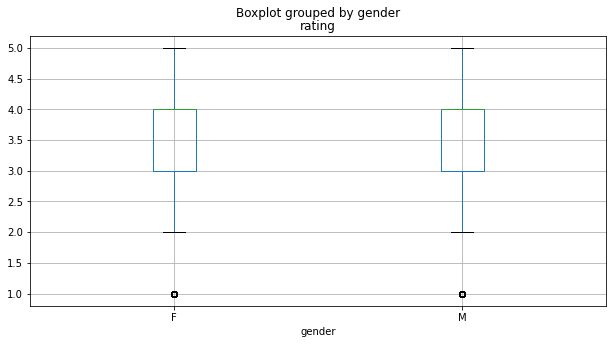

In [10]:
# your code and solutions

# boxplot for ratings by genders
Clean_Movielens.boxplot(["rating"], by="gender",figsize=(10, 5))

Hence, there is no correlation between gender and rating.

<AxesSubplot:title={'center':'rating'}, xlabel='occupation'>

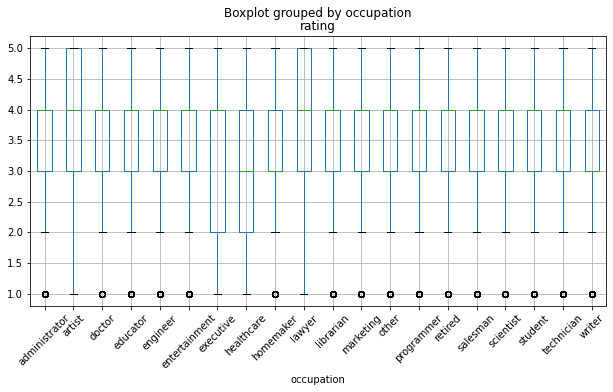

In [11]:
# boxplot for ratings by occupations
Clean_Movielens.boxplot(["rating"], by="occupation", rot=45, figsize=(10, 5))

Artist and Lawyer have provided higher rating, while Executive and Healthcare provided lower rating. Other than four occupation above, the rating provided by each occupation is the same.

Hence, there is a small correlation between occupation and movie rating.

<AxesSubplot:title={'center':'rating'}, xlabel='genre'>

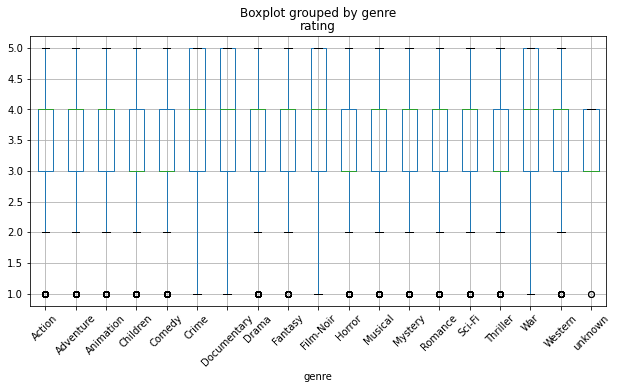

In [12]:
# boxplot for ratings by genre
Clean_Movielens.boxplot(["rating"], by="genre",rot=45, figsize=(10, 5))

4 genre categories, which are Crime, Documentary, Film-Noir, and War has higher rating compared with other categories. Other than four genre above, the rating provided by each genre is the same.

Same as before, the correlation between genre and rating seems weak. 

<AxesSubplot:ylabel='Frequency'>

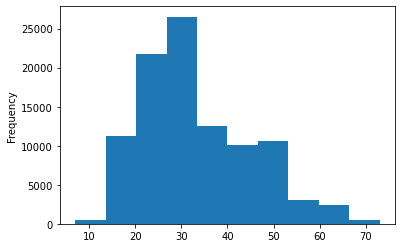

In [13]:
# histogram plot for age distribution in the csv
Clean_Movielens.age.plot(kind="hist")

The histogram is positively skewed. This indicates our respondent are mostly young people, with the most come from age 20-30

In [14]:
# counting the number of frequency for each occupation in the csv
Occupation = Clean_Movielens.groupby(["occupation"])["occupation"].count().reset_index(name = "Frequency")
Occupation.head()

,occupation,Frequency
0,administrator,7473
1,artist,2308
2,doctor,539
3,educator,9436
4,engineer,8173


<AxesSubplot:title={'center':'Frequency of Occupations Listed'}, xlabel='occupation'>

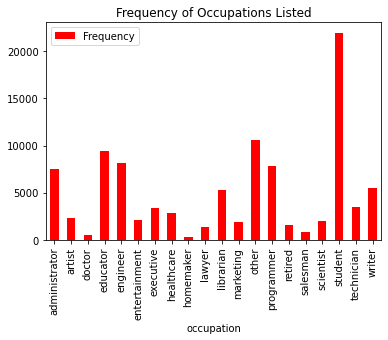

In [15]:
#from above result, a bar chart is plotted to find the most frequency for the occupation
Occupation.plot.bar(x="occupation",y="Frequency",color="red",title="Frequency of Occupations Listed")

This indicates most of the respondent are students, followed with others and educators.

In [16]:
# counting the frequency for each genre rated in the csv
Genre = Clean_Movielens.groupby(["genre"])["genre"].count().reset_index(name = "Frequency")
Genre.head()

,genre,Frequency
0,Action,10211
1,Adventure,3969
2,Animation,1191
3,Children,2853
4,Comedy,17369


This indicates most of the movie genres rated is drama, followed with comedy and action.

<AxesSubplot:title={'center':'Frequency of Movie Genre Listed'}, xlabel='genre'>

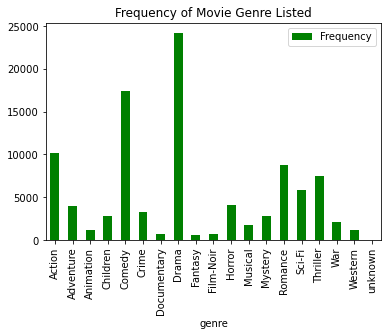

In [17]:
#from above result, a bar chart is plotted to find the most frequency for the genre
Genre.plot.bar(x="genre",y="Frequency",color="green",title="Frequency of Movie Genre Listed")

Accordding to the data plot above, most of our respondent are students. This are supported with the distribution of ages that shows most of the respondent aged around 20-30. During the survey, the mostly rated movies are drama, followed wth comedy and action.

This indicates that at the time survey taken, there are two possible reasons to drive this result:
(i) There are a lot of drama, comedy, and action movies that successfully capture respondents' interest. Usually this happens when the marketing of the movie are able to create a movie plot that can only be found out by watching the whole movie.
(ii) Student represents the demographic for most movie viewers. This may indicates that during their leisure time, watching movies is one of their popular options. In addition, students have the most leisure time compared with adults who have professional jobs.

#### Q4. Detect and remove outliers

We may define outlier users and movies with three rules:

* users whose age is no more than 10
* users who rate less than 20 movies
* movies that receives less than 10 ratings (i.e., movies that are rated by less than 10 users)
 
Please remove the corresponding records in the csv file that involves outlier users and movies. After that, __print the length of the data__.

In [18]:
# your code and solutions
# removing users whose age below 10
Rule_1 = Clean_Movielens[Clean_Movielens["age"] >= 10]

# removing users who rate less than 20 movies using dataframe created by Rule 1
# create new df by grouping movieId using userId, then count the userId that are showed
Counted_movie_by_user = Rule_1.groupby(["userId"])["movieId"].count().reset_index(name="Count")
Counted_movie_by_user = Counted_movie_by_user[Counted_movie_by_user["Count"] >= 20]
Counted_movie_by_user = Counted_movie_by_user.drop("Count", axis=1)
# join two dataframes using inner set, so only rows in both sets will show up, leaving users who rate more than 20 movies
Rule_2 = pd.merge(Rule_1,Counted_movie_by_user,how="inner",on="userId")

# removing movies that receive less than 10 rating using dataframe created by Rule 2
# create new df by grouping ratings using movieId, then count the movieId that are showed
Counted_rating_by_movie = Rule_2.groupby(["movieId"])["rating"].count().reset_index(name="Count")
Counted_rating_by_movie = Counted_rating_by_movie[Counted_rating_by_movie["Count"] >= 10]
Counted_rating_by_movie = Counted_rating_by_movie.drop("Count", axis=1)
# join two dataframes using inner set, so only rows in both sets will show up, leaving movie with more than 20 ratings
Rule_3 = pd.merge(Rule_2,Counted_rating_by_movie,how="inner",on="movieId")

new_Movielens = Rule_3
print("The length of the data after removing outliers is:", len(new_Movielens))

new_Movielens.head(10)

The length of the data after removing outliers is: 96885


,userId,age,gender,occupation,movieId,rating,genre,timestamp
0,196,49.0,M,writer,242,3.0,Comedy,881250949
1,305,23.0,M,programmer,242,5.0,Comedy,886307828
2,6,42.0,M,executive,242,4.0,Comedy,883268170
3,63,31.0,M,marketing,242,3.0,Comedy,875747190
4,181,26.0,M,executive,242,1.0,Comedy,878961814
5,201,27.0,M,writer,242,4.0,Comedy,884110598
6,249,25.0,M,student,242,5.0,Comedy,879571438
7,13,47.0,M,educator,242,2.0,Comedy,881515193
8,279,33.0,M,programmer,242,3.0,Comedy,877756647
9,145,31.0,M,entertainment,242,5.0,Comedy,875269755
